In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
from dask.diagnostics import ProgressBar
import esm2m.config_perturbations as cp

In [3]:
variable = 'dic'
dd = cp.load_exps(variable=variable,verbose=True)
dd = cp.calc_anom(dd)

/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_tracers/ts/monthly/10yr/ocean_bling_tracers.*.dic.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_gat_tracers/ts/monthly/10yr/ocean_bling_gat_tracers.*.dic.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_zero_tracers/ts/monthly/10yr/ocean_bling_zero_tracers.*.dic.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_double_tracers/ts/monthly/10yr/ocean_bling_double_tracers.*.dic.nc


In [4]:
exps = list(dd.keys())
grid = cp.load_grid()
grid['dz'] = dd[exps[0]]['st_edges_ocean'].diff('st_edges_ocean'
                                               ).rename({'st_edges_ocean':'st_ocean'}
                                                       ).assign_coords({'st_ocean':dd[exps[0]]['st_ocean']})
grid['volume_t'] = grid['area_t']*grid['dz']

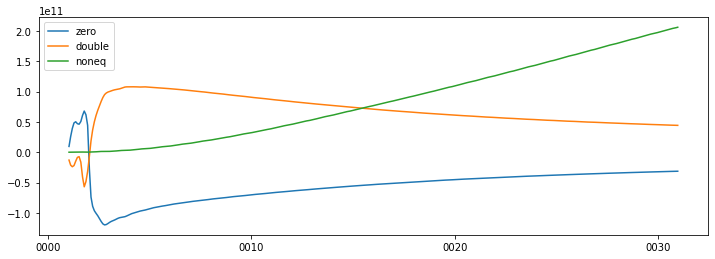

In [54]:
fig,axarr = plt.subplots(figsize=(12,4))
perturbations = ['zero','double','noneq']
variable = 'dic'
for p in perturbations:
    tmp = (dd[p][variable]*grid['volume_t']).sum(['xt_ocean','yt_ocean','st_ocean'])
#     tmp = dd[p][variable]
    axarr.plot(tmp['time'],tmp,label=p)
axarr.legend()

## Time series of global integrals

chl
dic
dop
fed
o2
po4


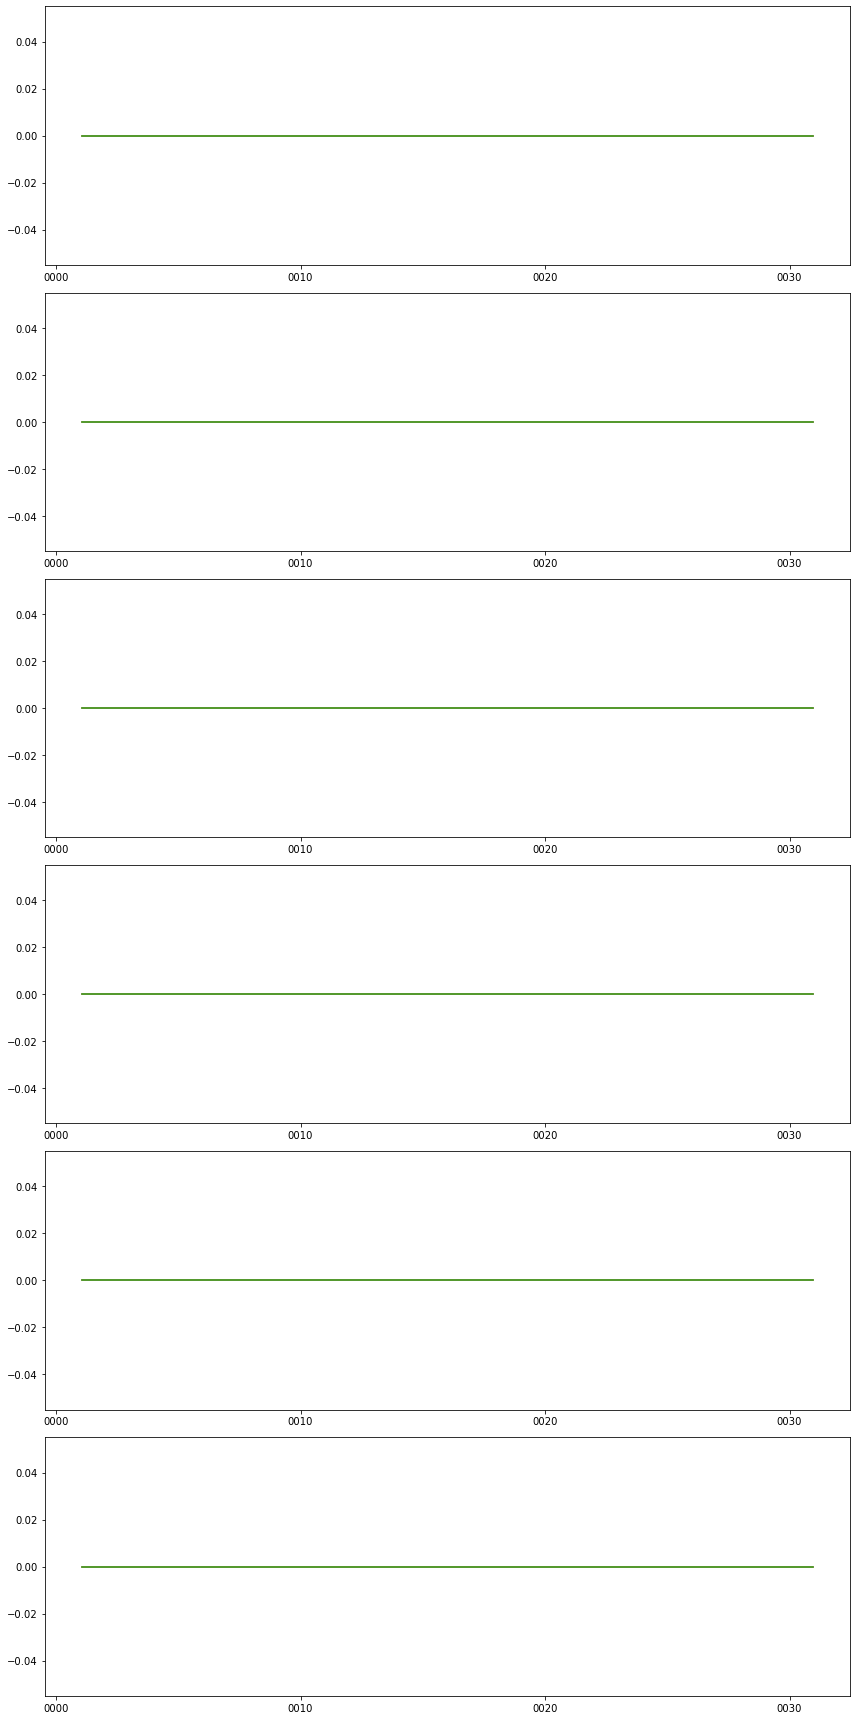

In [35]:
variables = ['chl','dic','dop','fed','o2','po4']
perturbations = ['zero','double','noneq']
nv = len(variables)
fig,axarr = plt.subplots(figsize=(12,4*nv),nrows=nv)
for i,variable in enumerate(variables[0:1]):
    print(variable)
    dd = load_exps(variable=variable,verbose=False)
    dd = calc_anom(dd)
    ax = axarr.flat[i]
    for p in perturbations:
        tmp = (dd[p][variable]*grid['volume_t']).sum(['xt_ocean','yt_ocean','st_ocean'])
        ax.plot(tmp['time'],tmp,label=p)
fig.tight_layout()

In [ ]:
variables = ['chl','dic','dop','fed','o2','po4']
conversion = {'chl':1035.0,'dic':1,'dop':1,'fed':1,'o2':1,'po4':1}
perturbations = ['zero','double','noneq']
nv = len(variables)
fig,axarr = plt.subplots(figsize=(12,4*nv),nrows=nv)
for i,variable in enumerate(variables):
    print(variable)
    dd = load_exps(variable=variable,verbose=False)
    dd = calc_anom(dd)
    ax = axarr.flat[i]
    for p in perturbations:
        tmp = (dd[p][variable]*grid['volume_t']).sum(['xt_ocean','yt_ocean','st_ocean'])
        ax.plot(tmp['time'],tmp,label=p)
fig.tight_layout()

chl
dic
dop
fed


In [34]:
# dmgets
ppname = 'ocean_bling_tracers'
variable = 'o2'
dmget_exps(variable=variable,verbose=True,wait=True)

dmget /archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_tracers/ts/monthly/10yr/ocean_bling_tracers.*.o2.nc
dmget /archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_gat_tracers/ts/monthly/10yr/ocean_bling_gat_tracers.*.o2.nc
dmget /archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_zero_tracers/ts/monthly/10yr/ocean_bling_zero_tracers.*.o2.nc
dmget /archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_double_tracers/ts/monthly/10yr/ocean_bling_double_tracers.*.o2.nc


In [10]:
grid

<xarray.Dataset>
Dimensions:    (xt: 360, xt_ocean: 360, xu_ocean: 360, yt: 200, yt_ocean: 200, yu_ocean: 200)
Coordinates:
  * xt         (xt) float64 -279.5 -278.6 -277.6 -276.6 ... 77.6 78.56 79.52
  * yt         (yt) float64 -81.5 -80.5 -79.5 -78.5 ... 78.0 78.35 78.62 78.78
    geolat_c   (yu_ocean, xu_ocean) float32 ...
    geolat_t   (yt_ocean, xt_ocean) float32 ...
    geolon_c   (yu_ocean, xu_ocean) float32 ...
    geolon_t   (yt_ocean, xt_ocean) float32 ...
  * xt_ocean   (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * xu_ocean   (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yt_ocean   (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 87.5 88.5 89.5
  * yu_ocean   (yu_ocean) float64 -81.0 -80.0 -79.0 -78.0 ... 88.0 89.0 90.0
Data variables:
    CELL_AREA  (yt, xt) float32 ...
    COSROT     (yt, xt) float32 ...
    GEOLAT     (yt, xt) float32 ...
    GEOLON     (yt, xt) float32 ...
    SINROT     (yt, xt) float32 ...
    area_t     (yt_ocean, xt_ocean) float32 ...
    area_u     (yu_ocean, xu_ocean) float32 ...
    ht         (yt_ocean, xt_ocean) float32 ...
    hu         (yu_ocean, xu_ocean) float32 ...
    kmt        (yt_ocean, xt_ocean) float32 ...
    kmu        (yu_ocean, xu_ocean) float32 ...
Attributes:
    history:                    Tue Mar 17 16:13:07 2020: ncks --append --var...
    history_of_appended_files:  Tue Mar 17 16:13:07 2020: Appended file ./000...
    NCO:                        "4.5.4"

In [38]:
perturbations = ['zero','double','noneq']

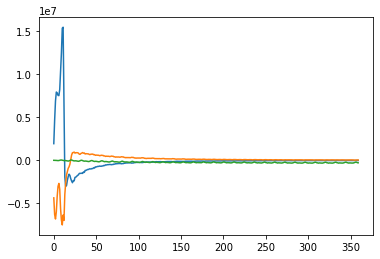

### Tracers

In [89]:
pp = '/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/'
ppname_pre = 'ocean_bling'
ppname_suf = '_tracers'
localdir = '/ts/monthly/10yr/'
experiments = ['','_gat','_zero','_double']
var = 'po4'
timespan = '*'
dd = {}
for e in experiments:
    ppname = ppname_pre+e+ppname_suf
    filename = ppname+'.'+timespan+'.'+var+'.nc'
    path = pp+ppname+localdir+filename
    print(path)
    dd[e] = xr.open_mfdataset(path)

# Grid
gridpath = pp+'static.nc'
grid = xr.open_dataset(gridpath)
# Difference
dd['zero'] = dd['_zero']-dd['_gat']
dd['double'] = dd['_double']-dd['_gat']
dd['noneq'] = dd['']-dd['_gat']
perturbations = ['zero','double','noneq']

/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_tracers/ts/monthly/10yr/ocean_bling_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_gat_tracers/ts/monthly/10yr/ocean_bling_gat_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_zero_tracers/ts/monthly/10yr/ocean_bling_zero_tracers.*.po4.nc
/archive/Richard.Slater/Siena/siena_201308_rds-c3-gat-slurm/MOM5_SIS_BLING_CORE2-gat/gfdl.ncrc3-intel16-prod-openmp/pp/ocean_bling_double_tracers/ts/monthly/10yr/ocean_bling_double_tracers.*.po4.nc


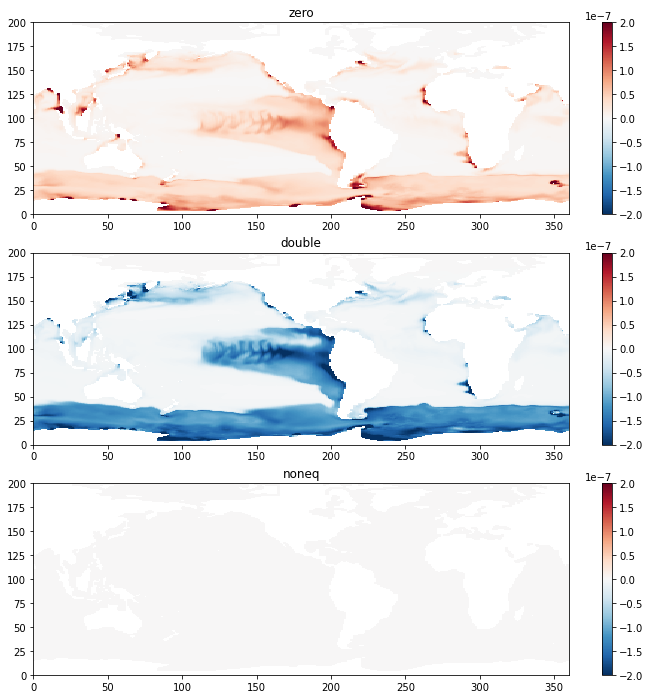

In [90]:
iselect = {'time':0*12,'st_ocean':0}
kwargs = {'vmin':-2E-7,'vmax':2E-7,'cmap':'RdBu_r'}
fig,axarr=plt.subplots(figsize=(12,12),nrows=3)
for i,p in enumerate(perturbations):
    ax = axarr.flat[i]
    tmp = dd[p][var].isel(iselect)
    im = ax.pcolormesh(tmp,**kwargs)
    ax.set_title(p)
    plt.colorbar(im,ax=ax)

In [79]:
dd['']

<xarray.Dataset>
Dimensions:         (nv: 2, scalar_axis: 1, st_edges_ocean: 51, st_ocean: 50, time: 360, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean        (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean        (yt_ocean) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * st_ocean        (st_ocean) float64 5.0 15.0 25.0 ... 4.95e+03 5.316e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.0 20.0 ... 5.133e+03 5.5e+03
  * time            (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:00:00
  * nv              (nv) float64 1.0 2.0
  * scalar_axis     (scalar_axis) float64 0.0
Data variables:
    delta_pco2      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(120, 200, 360), meta=np.ndarray>
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(120, 2), meta=np.ndarray>
Attributes:
    filename:   00010101.ocean_bling_tracers.nc
    title:      MOM5_SIS_BLING_CORE2-gat-initial
    grid_type:  mosaic
    grid_tile:  1
    history:    2020-03-18 11:56:08 -0400: PostProcessing::PPNetCDF::time_mea...

In [58]:
dd['']

<xarray.Dataset>
Dimensions:              (nv: 2, scalar_axis: 1, st_edges_ocean: 51, st_ocean: 50, time: 360, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean             (xt_ocean) float64 -279.5 -278.5 -277.5 ... 78.5 79.5
  * yt_ocean             (yt_ocean) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * st_ocean             (st_ocean) float64 5.0 15.0 25.0 ... 4.95e+03 5.316e+03
  * st_edges_ocean       (st_edges_ocean) float64 0.0 10.0 ... 5.133e+03 5.5e+03
  * time                 (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:...
  * nv                   (nv) float64 1.0 2.0
  * scalar_axis          (scalar_axis) float64 0.0
Data variables:
    po4                  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(120, 50, 200, 360), meta=np.ndarray>
    time_bounds          (time, nv) timedelta64[ns] dask.array<chunksize=(120, 2), meta=np.ndarray>
    po4_area_integral    (time, st_ocean) float32 dask.array<chunksize=(120, 50), meta=np.ndarray>
    po4_volume_integral  (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
Attributes:
    filename:   00010101.ocean_bling_tracers.nc
    title:      MOM5_SIS_BLING_CORE2-gat-initial
    grid_type:  mosaic
    grid_tile:  1
    history:    2020-03-18 11:57:43 -0400: PostProcessing::PPNetCDF::time_mea...